In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = r"C:\Users\user\Documents\LetsUpgrade\Notes\Day 21\Linear Regression.xlsx"
price_pred = pd.read_excel(filepath) 

In [3]:
price_pred.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [4]:
price_pred.shape

(21613, 5)

In [5]:
price_pred.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [6]:
price_pred.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


In [7]:
price_pred.skew() 

price          4.024069
sqft_living    1.471555
bedrooms       1.974300
bathrooms      0.511108
floors         0.616177
dtype: float64

In [8]:
price_pred.kurt()

price          34.585540
sqft_living     5.243093
bedrooms       49.063653
bathrooms       1.279902
floors         -0.484723
dtype: float64

In [9]:
price_pred.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


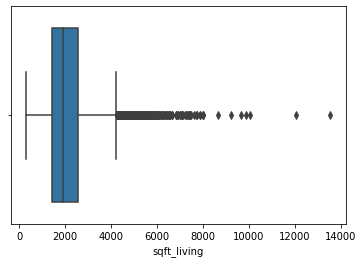

In [13]:
sns.boxplot(price_pred['sqft_living'])

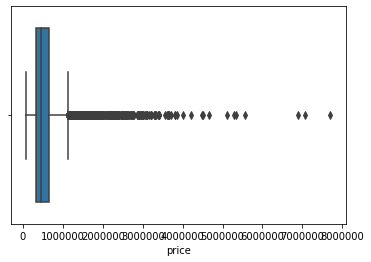

In [14]:
sns.boxplot(price_pred['price'])

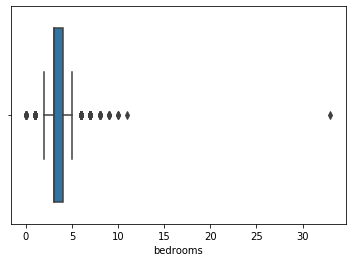

In [15]:
sns.boxplot(price_pred['bedrooms'])

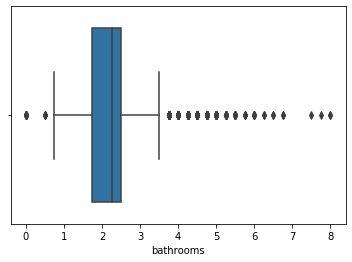

In [16]:
sns.boxplot(price_pred['bathrooms'])

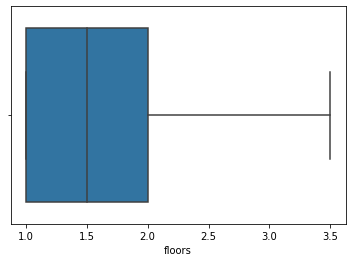

In [17]:
sns.boxplot(price_pred['floors'])

In [22]:
price = price_pred.iloc[:,:1]
price

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


In [23]:
sq_ft = price_pred.iloc[:,1:2]
sq_ft

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [26]:
bedrooms = price_pred.iloc[:,2:3]
bedrooms

,bedrooms
0,3
1,3
2,2
3,4
4,3
...,...
21608,3
21609,4
21610,2
21611,3


In [27]:
bathrooms = price_pred.iloc[:,3:4]
bathrooms

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00
...,...
21608,2.50
21609,2.50
21610,0.75
21611,2.50


In [29]:
floors = price_pred.iloc[:,-1:]
floors

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0
...,...
21608,3.0
21609,2.0
21610,2.0
21611,2.0


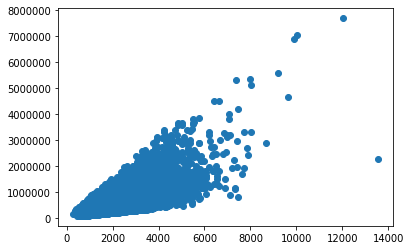

In [98]:
plt.scatter(sq_ft,price)

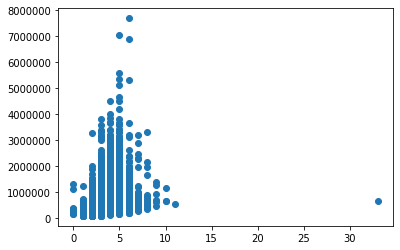

In [99]:
plt.scatter(bedrooms,price)

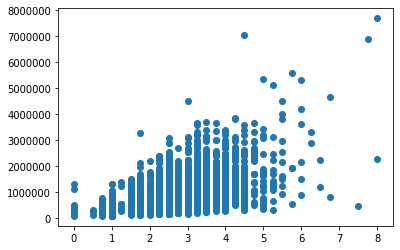

In [100]:
plt.scatter(bathrooms,price)

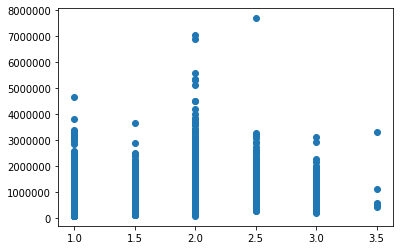

In [101]:
plt.scatter(floors,price)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sq_ft,price,test_size = 0.2,random_state = 2)

In [61]:
price_pred.shape

(21613, 5)

In [62]:
X_train.shape

(17290, 1)

In [63]:
X_test.shape

(4323, 1)

In [64]:
y_train.shape

(17290, 1)

In [65]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [66]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
lin_reg.coef_

array([[280.67382569]])

In [68]:
lin_reg.intercept_

array([-42568.70358496])

In [69]:
ypred=lin_reg.predict(X_test)
ypred

array([[633855.21632509],
       [566493.49815977],
       [364408.34366382],
       ...,
       [701216.9344904 ],
       [187583.83347987],
       [465450.9209118 ]])

In [70]:
X_test.head()

,sqft_living
6638,2410
7366,2170
3158,1450
9117,4500
3392,860


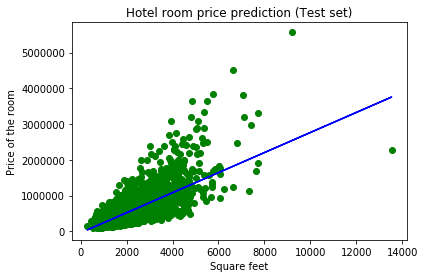

In [71]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.title('Hotel room price prediction (Test set)')
plt.xlabel('Square feet')
plt.ylabel('Price of the room')
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.5031163723285275
The RMSE value is........ 263380.00189817196


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bedrooms,price,test_size = 0.2,random_state = 2)

In [92]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
lin_reg.coef_

array([[118660.62797869]])

In [94]:
lin_reg.intercept_

array([139952.87593386])

In [95]:
ypred=lin_reg.predict(X_test)
ypred

array([[614595.3878486 ],
       [495934.75986992],
       [377274.13189123],
       ...,
       [614595.3878486 ],
       [377274.13189123],
       [614595.3878486 ]])

In [96]:
X_test.head()

,bedrooms
6638,4
7366,3
3158,2
9117,5
3392,2


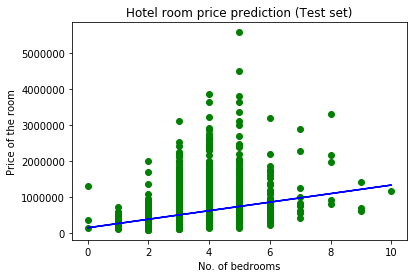

In [97]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.title('Hotel room price prediction (Test set)')
plt.xlabel('No. of bedrooms')
plt.ylabel('Price of the room')
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.10886345250291596
The RMSE value is........ 352717.96541876445


In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bathrooms,price,test_size = 0.2,random_state = 2)

In [104]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
lin_reg.coef_

array([[249143.95803858]])

In [106]:
lin_reg.intercept_

array([13073.9957529])

In [107]:
ypred=lin_reg.predict(X_test)
ypred

array([[573647.90133969],
       [386789.93281076],
       [262217.95379147],
       ...,
       [635933.89084934],
       [262217.95379147],
       [698219.88035898]])

In [108]:
X_test.head()

,bathrooms
6638,2.25
7366,1.50
3158,1.00
9117,3.25
3392,1.00


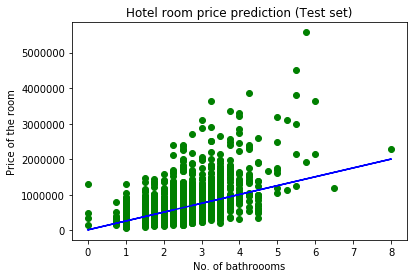

In [109]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.title('Hotel room price prediction (Test set)')
plt.xlabel('No. of bathroooms')
plt.ylabel('Price of the room')
plt.show()

In [110]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.28122887124177365
The RMSE value is........ 316774.90190998075


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(floors,price,test_size = 0.2,random_state = 2)

In [113]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
lin_reg.coef_

array([[171376.44562902]])

In [115]:
lin_reg.intercept_

array([283309.93245028])

In [116]:
ypred=lin_reg.predict(X_test)
ypred

array([[540374.60089382],
       [454686.37807931],
       [454686.37807931],
       ...,
       [626062.82370833],
       [454686.37807931],
       [540374.60089382]])

In [117]:
X_test.head()

,floors
6638,1.5
7366,1.0
3158,1.0
9117,2.0
3392,1.0


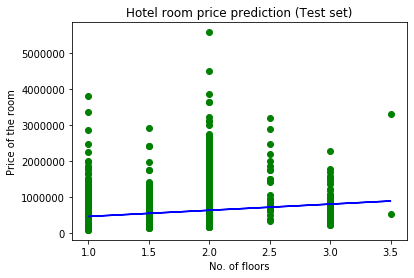

In [119]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.title('Hotel room price prediction (Test set)')
plt.xlabel('No. of floors')
plt.ylabel('Price of the room')
plt.show()

In [120]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.0733487976687478
The RMSE value is........ 359677.77234107786


In [124]:
y = price_pred.iloc[:,:1]
y

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


In [125]:
x = price_pred.iloc[:,1:]
x

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0
...,...,...,...,...
21608,1530,3,2.50,3.0
21609,2310,4,2.50,2.0
21610,1020,2,0.75,2.0
21611,1600,3,2.50,2.0


In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [127]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
lin_reg.coef_

array([[   309.11099034, -57550.54119311,   8440.49060067,
         -1165.39355228]])

In [129]:
lin_reg.intercept_

array([76097.6329834])

In [130]:
ypred=lin_reg.predict(X_test)
ypred

array([[608095.96846158],
       [585712.20079791],
       [416482.58364346],
       ...,
       [683810.03201801],
       [221742.65972713],
       [426849.61955589]])

In [140]:
X_test.head()

,sqft_living,bedrooms,bathrooms,floors,price
6638,2410,4,2.25,1.5,6.080960e+05
7366,2170,3,1.50,1.0,5.857122e+05
3158,1450,2,1.00,1.0,4.164826e+05
9117,4500,5,3.25,2.0,1.204445e+06
3392,860,2,1.00,1.0,2.341071e+05


In [141]:
y_test.head()

,price
6638,735000
7366,1150000
3158,350500
9117,860000
3392,122000


In [138]:
price_pred

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0
...,...,...,...,...,...
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0


In [142]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.5166693554435362
The RMSE value is........ 259763.19584802483
